In [1]:
import numpy as np
import pandas as pd
from sklearn import *
import nltk, datetime
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns
from collections import defaultdict

C:\Users\lucas\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\lucas\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\lucas\Anaconda2\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [4]:
train = pd.read_csv('../data/sales_train_v2.csv')
test = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/sample_submission.csv')
items = pd.read_csv('../data/items.csv')
item_cats = pd.read_csv('../data/item_categories.csv')
shops = pd.read_csv('../data/shops.csv')
print('train:', train.shape, 'test:', test.shape)

('train:', (2935849, 6), 'test:', (214200, 3))


Text(0.5,0,u'Date block number')

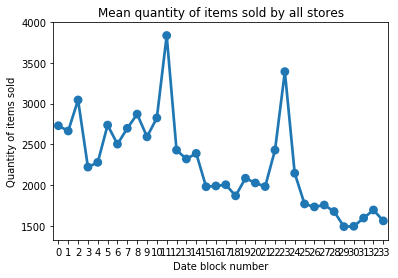

In [6]:
grouped = pd.DataFrame(train.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())

max_date_block = max(grouped['date_block_num'])
used_shop_ids = 0

lista = [0] * (max_date_block + 1)

for shop_id in set(grouped['shop_id'].values):
    grouped_shop_id = grouped.loc[grouped['shop_id'] == shop_id]
    if(len(grouped_shop_id.values) > 32):
        used_shop_ids+=1
        for item in range(len(grouped_shop_id.values)):
            lista[item] += grouped_shop_id.values[item][2]
        
for i in range(len(lista)):
    lista[i] = lista[i] / used_shop_ids

plot = sns.pointplot(x=range(34),y=lista)
plot.set_title("Mean quantity of items sold by all stores")
plot.set_ylabel("Quantity of items sold")
plot.set_xlabel("Date block number")